# Введение и результаты испытаний

# Используемые библиотеки и настройки

In [24]:
#Библиотеки
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from numpy import where
import time

#Настройки
num_of_sampeles = 1000 # Число семплов для генерации датасета
num_of_epochs = 200 # Число эпох обучения
size_of_fig = (10, 6) # Размер графиков
opt = "Adamax" #Оптимизатор для модели

# Создание датасета

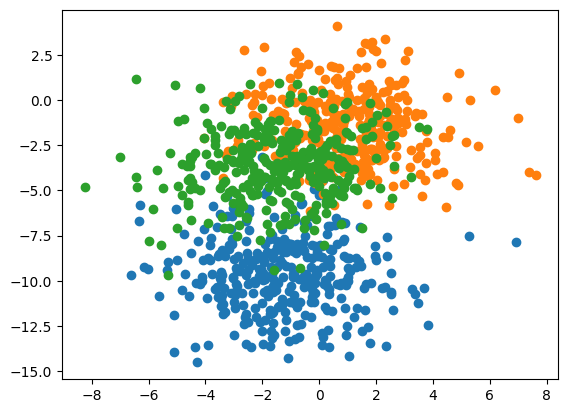

<Figure size 1200x1200 with 0 Axes>

In [2]:
X, y = make_blobs(n_samples=num_of_sampeles, centers=3, n_features=2, cluster_std=2, random_state=2)

# график рассеяния для значения каждого класса
for class_value in range(3):
 # select indices of points with the class label
 row_ix = where(y == class_value)
 # scatter plot for points with a different color
 plt.scatter(X[row_ix, 0], X[row_ix, 1])
# Отрисуем график
plt.figure(figsize=(12, 12))
plt.show()

# one hot encode output variable
y = to_categorical(y)
# Разделим на тренировочную (train) и тестовую (test) выборки (50/50)
n_train = int (num_of_sampeles / 2)
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Задание модели нейронной сети и её компиляция

In [26]:
def NN_Model(loss_func):
  # Определение модели
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  # Компиляция модели
  model.compile(loss=loss_func, optimizer=opt, metrics=['accuracy'])
  return model

# Отрисовка графиков

In [22]:
def Draw_Figure(history):
  # Вывод графика результата обучения
  plt.figure(figsize = size_of_fig)
  plt.hlines(0, 0, num_of_epochs)
  plt.xlim(0, num_of_epochs)
  plt.plot(history.history['accuracy'], linewidth = 2, label='train')
  plt.plot(history.history['val_accuracy'], linewidth = 2, label='test')
  plt.grid()
  plt.xlabel("Количество эпох")
  plt.ylabel("Точность предсказания (accuracy)")
  plt.legend()
  plt.show()

  #Потери
  plt.figure(figsize = size_of_fig)
  plt.hlines(0, 0, num_of_epochs)
  plt.xlim(0, num_of_epochs)
  plt.plot(history.history['loss'], linewidth = 2, label = 'train')
  plt.plot(history.history['val_loss'], linewidth = 2, label='test')
  plt.grid()
  plt.xlabel("Количество эпох")
  plt.ylabel('Потери (loss)')
  plt.legend()
  plt.show()

# Binary Cross-Entropy

Epoch 1/200
1/1 [==============================] - 1s 764ms/step - loss: 0.6402 - accuracy: 0.4280 - val_loss: 0.6380 - val_accuracy: 0.3960
Epoch 2/200
1/1 [==============================] - 0s 49ms/step - loss: 0.6324 - accuracy: 0.4280 - val_loss: 0.6310 - val_accuracy: 0.3940
Epoch 3/200
1/1 [==============================] - 0s 39ms/step - loss: 0.6252 - accuracy: 0.4260 - val_loss: 0.6245 - val_accuracy: 0.3940
Epoch 4/200
1/1 [==============================] - 0s 57ms/step - loss: 0.6187 - accuracy: 0.4260 - val_loss: 0.6184 - val_accuracy: 0.3920
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 0.6127 - accuracy: 0.4300 - val_loss: 0.6128 - val_accuracy: 0.3920
Epoch 6/200
1/1 [==============================] - 0s 44ms/step - loss: 0.6071 - accuracy: 0.4300 - val_loss: 0.6075 - val_accuracy: 0.3920
Epoch 7/200
1/1 [==============================] - 0s 58ms/step - loss: 0.6020 - accuracy: 0.4280 - val_loss: 0.6026 - val_accuracy: 0.3960
Epoch 8/200
1/1 [==

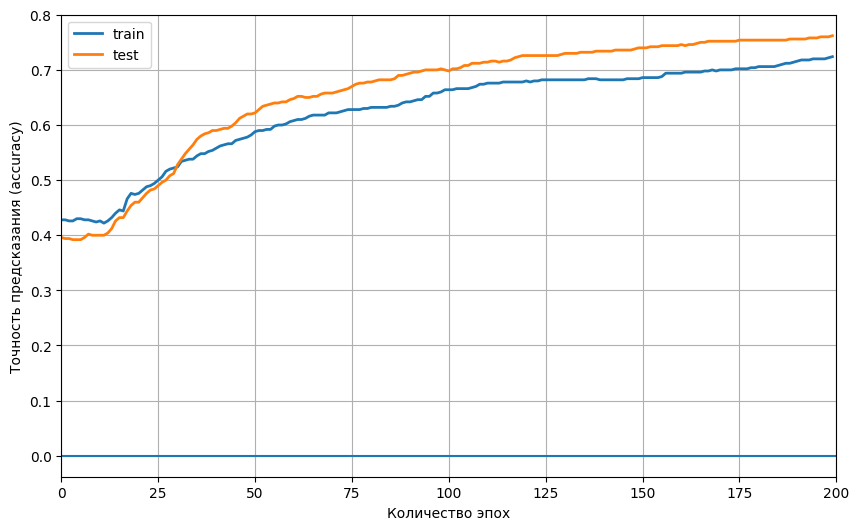

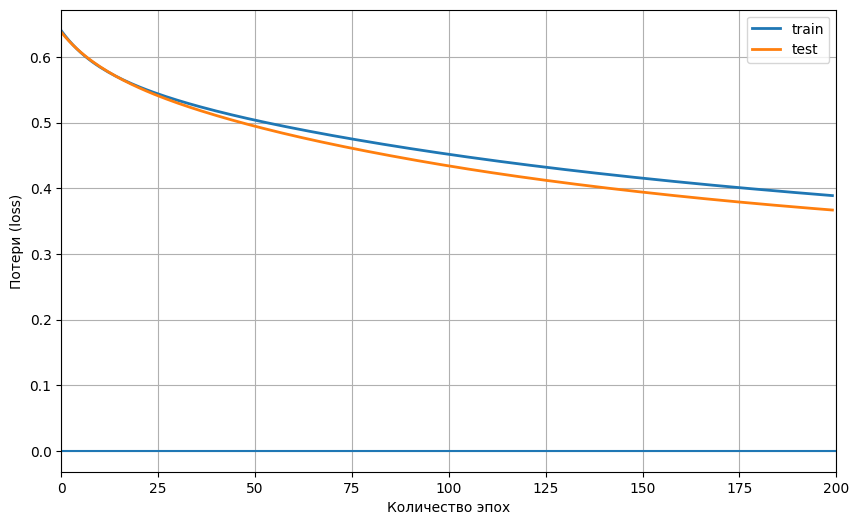

In [27]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('BinaryCrossentropy')
history_1 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_1)

# Binary Focal Cross-Entropy

Epoch 1/200
1/1 [==============================] - 1s 823ms/step - loss: 0.3577 - accuracy: 0.2880 - val_loss: 0.3424 - val_accuracy: 0.2700
Epoch 2/200
1/1 [==============================] - 0s 41ms/step - loss: 0.3369 - accuracy: 0.2860 - val_loss: 0.3232 - val_accuracy: 0.2660
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3168 - accuracy: 0.2820 - val_loss: 0.3048 - val_accuracy: 0.2580
Epoch 4/200
1/1 [==============================] - 0s 54ms/step - loss: 0.2977 - accuracy: 0.2700 - val_loss: 0.2873 - val_accuracy: 0.2440
Epoch 5/200
1/1 [==============================] - 0s 44ms/step - loss: 0.2796 - accuracy: 0.2600 - val_loss: 0.2709 - val_accuracy: 0.2320
Epoch 6/200
1/1 [==============================] - 0s 45ms/step - loss: 0.2628 - accuracy: 0.2540 - val_loss: 0.2557 - val_accuracy: 0.2240
Epoch 7/200
1/1 [==============================] - 0s 60ms/step - loss: 0.2472 - accuracy: 0.2400 - val_loss: 0.2417 - val_accuracy: 0.2080
Epoch 8/200
1/1 [==

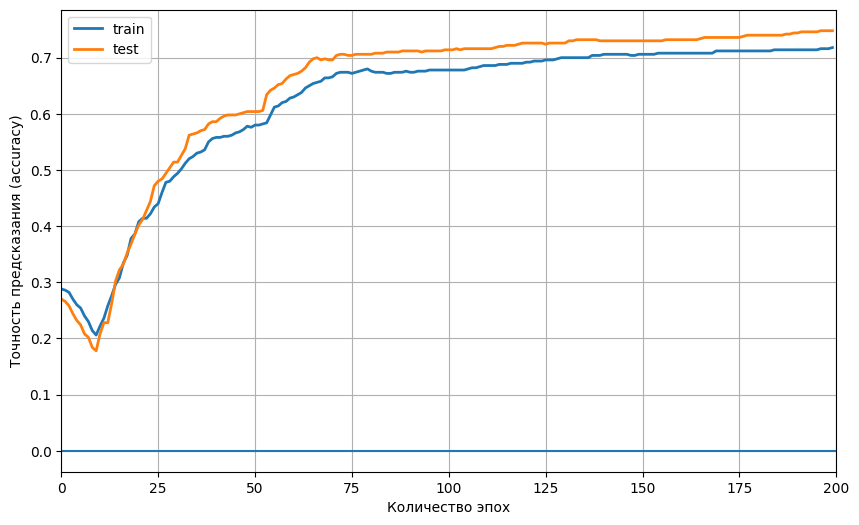

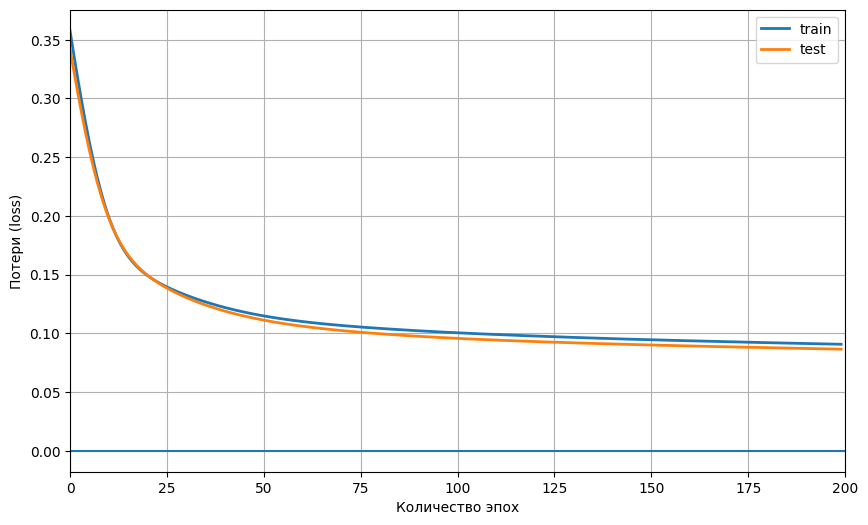

In [28]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('BinaryFocalCrossentropy')
history_2 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_2)

# Categorical Cross-Entropy

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.4850 - accuracy: 0.1980 - val_loss: 1.4483 - val_accuracy: 0.2100
Epoch 2/200
1/1 [==============================] - 0s 61ms/step - loss: 1.4471 - accuracy: 0.2040 - val_loss: 1.4139 - val_accuracy: 0.2160
Epoch 3/200
1/1 [==============================] - 0s 62ms/step - loss: 1.4109 - accuracy: 0.2100 - val_loss: 1.3810 - val_accuracy: 0.2100
Epoch 4/200
1/1 [==============================] - 0s 43ms/step - loss: 1.3765 - accuracy: 0.2060 - val_loss: 1.3497 - val_accuracy: 0.2040
Epoch 5/200
1/1 [==============================] - 0s 44ms/step - loss: 1.3438 - accuracy: 0.2060 - val_loss: 1.3197 - val_accuracy: 0.2140
Epoch 6/200
1/1 [==============================] - 0s 49ms/step - loss: 1.3127 - accuracy: 0.2140 - val_loss: 1.2913 - val_accuracy: 0.2200
Epoch 7/200
1/1 [==============================] - 0s 41ms/step - loss: 1.2832 - accuracy: 0.2160 - val_loss: 1.2642 - val_accuracy: 0.2240
Epoch 8/200
1/1 [=====

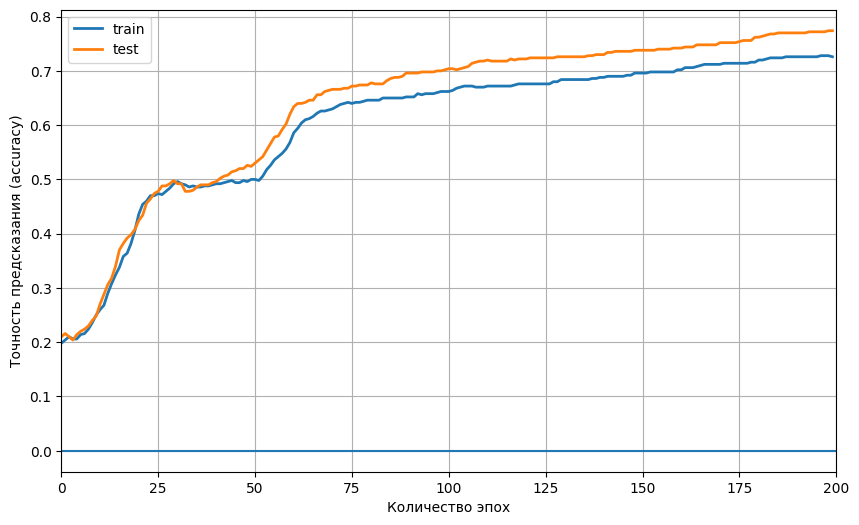

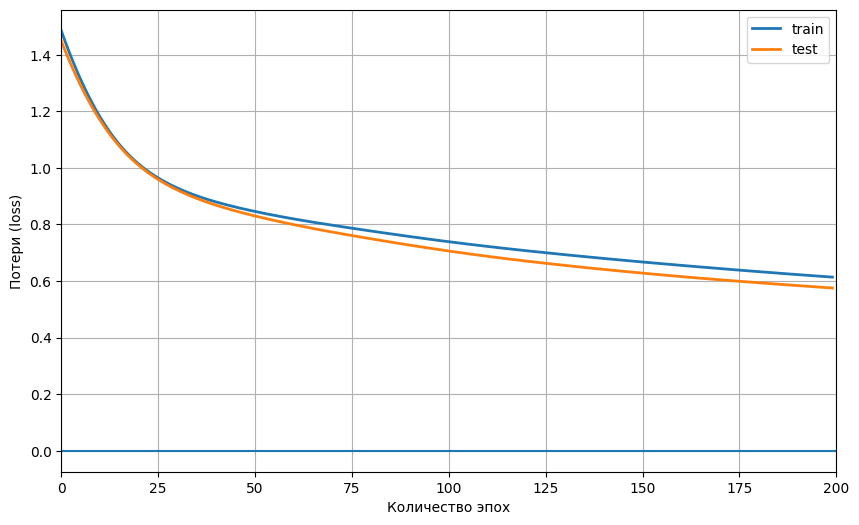

In [31]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('CategoricalCrossentropy')
history_3 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_3)

# Categorical Focal Crossentropy

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.2451 - accuracy: 0.4780 - val_loss: 0.2199 - val_accuracy: 0.5120
Epoch 2/200
1/1 [==============================] - 0s 71ms/step - loss: 0.2318 - accuracy: 0.4820 - val_loss: 0.2078 - val_accuracy: 0.5100
Epoch 3/200
1/1 [==============================] - 0s 79ms/step - loss: 0.2188 - accuracy: 0.4800 - val_loss: 0.1961 - val_accuracy: 0.5160
Epoch 4/200
1/1 [==============================] - 0s 77ms/step - loss: 0.2062 - accuracy: 0.4760 - val_loss: 0.1848 - val_accuracy: 0.5160
Epoch 5/200
1/1 [==============================] - 0s 73ms/step - loss: 0.1941 - accuracy: 0.4760 - val_loss: 0.1740 - val_accuracy: 0.5200
Epoch 6/200
1/1 [==============================] - 0s 54ms/step - loss: 0.1825 - accuracy: 0.4760 - val_loss: 0.1636 - val_accuracy: 0.5220
Epoch 7/200
1/1 [==============================] - 0s 52ms/step - loss: 0.1715 - accuracy: 0.4740 - val_loss: 0.1539 - val_accuracy: 0.5140
Epoch 8/200
1/1 [=====

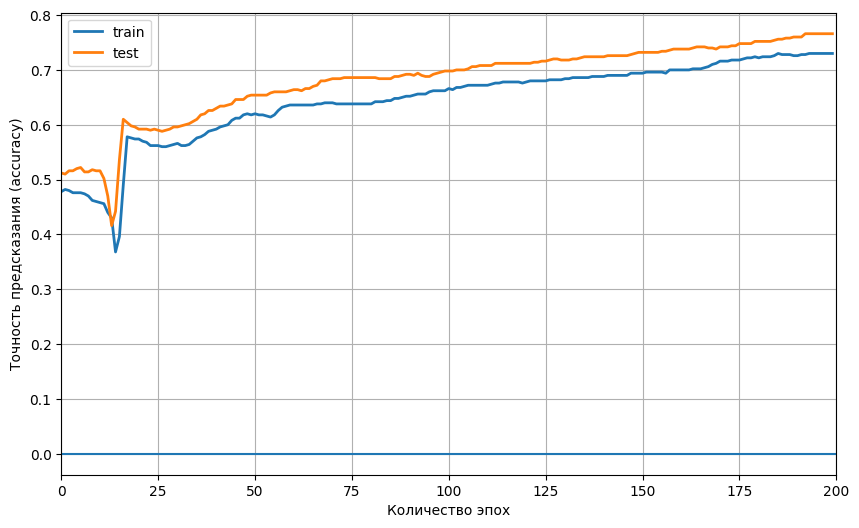

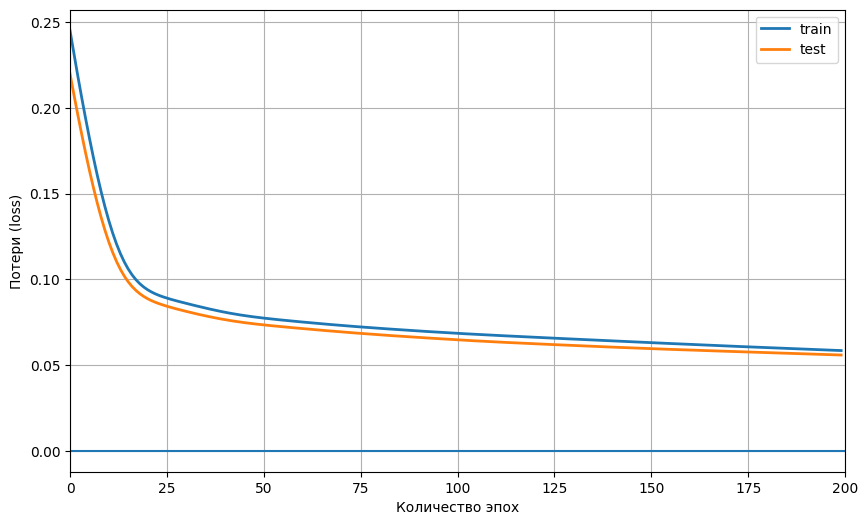

In [32]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('CategoricalFocalCrossentropy')
history_4 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_4)

# Mean Absolute Error

Epoch 1/200
1/1 [==============================] - 1s 967ms/step - loss: 0.4102 - accuracy: 0.4440 - val_loss: 0.3994 - val_accuracy: 0.4860
Epoch 2/200
1/1 [==============================] - 0s 58ms/step - loss: 0.4054 - accuracy: 0.4600 - val_loss: 0.3944 - val_accuracy: 0.5100
Epoch 3/200
1/1 [==============================] - 0s 41ms/step - loss: 0.4006 - accuracy: 0.4760 - val_loss: 0.3893 - val_accuracy: 0.5280
Epoch 4/200
1/1 [==============================] - 0s 59ms/step - loss: 0.3956 - accuracy: 0.4880 - val_loss: 0.3841 - val_accuracy: 0.5360
Epoch 5/200
1/1 [==============================] - 0s 106ms/step - loss: 0.3905 - accuracy: 0.5140 - val_loss: 0.3788 - val_accuracy: 0.5600
Epoch 6/200
1/1 [==============================] - 0s 81ms/step - loss: 0.3854 - accuracy: 0.5200 - val_loss: 0.3735 - val_accuracy: 0.5940
Epoch 7/200
1/1 [==============================] - 0s 91ms/step - loss: 0.3801 - accuracy: 0.5500 - val_loss: 0.3682 - val_accuracy: 0.6120
Epoch 8/200
1/1 [=

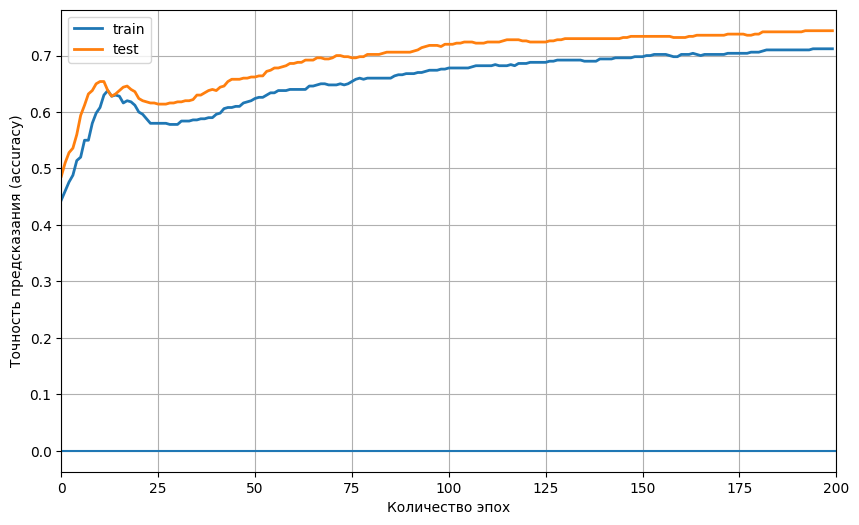

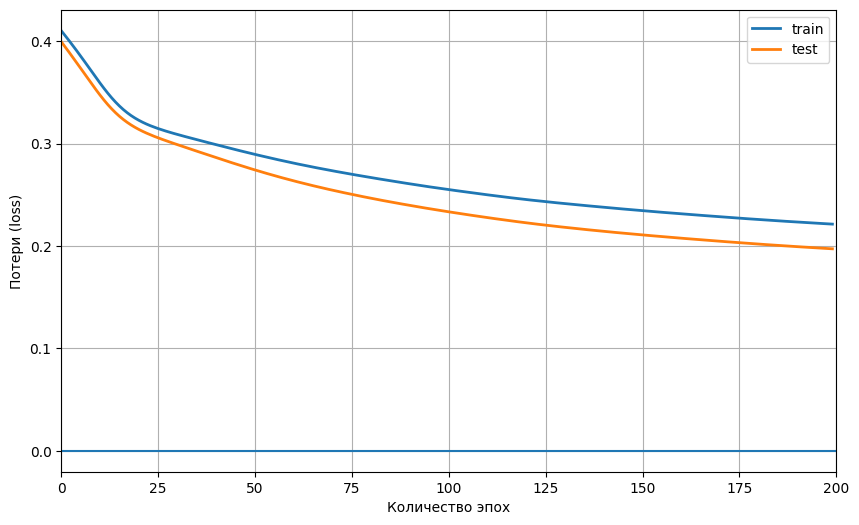

In [33]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('MeanAbsoluteError')
history_5 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_5)

# Mean Squared Error

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.2291 - accuracy: 0.3420 - val_loss: 0.2260 - val_accuracy: 0.3320
Epoch 2/200
1/1 [==============================] - 0s 57ms/step - loss: 0.2242 - accuracy: 0.3440 - val_loss: 0.2210 - val_accuracy: 0.3320
Epoch 3/200
1/1 [==============================] - 0s 66ms/step - loss: 0.2194 - accuracy: 0.3440 - val_loss: 0.2162 - val_accuracy: 0.3320
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2147 - accuracy: 0.3540 - val_loss: 0.2117 - val_accuracy: 0.3360
Epoch 5/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2103 - accuracy: 0.3560 - val_loss: 0.2074 - val_accuracy: 0.3400
Epoch 6/200
1/1 [==============================] - 0s 57ms/step - loss: 0.2061 - accuracy: 0.3580 - val_loss: 0.2035 - val_accuracy: 0.3520
Epoch 7/200
1/1 [==============================] - 0s 43ms/step - loss: 0.2022 - accuracy: 0.3700 - val_loss: 0.2000 - val_accuracy: 0.3700
Epoch 8/200
1/1 [=====

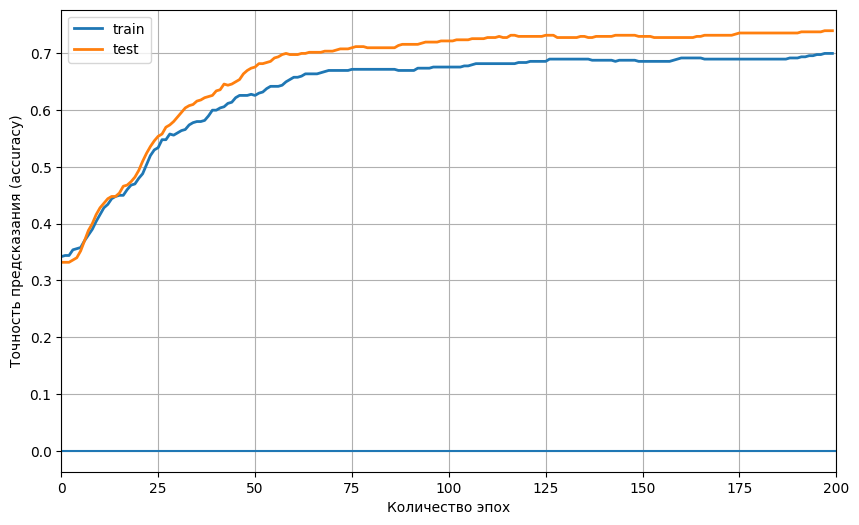

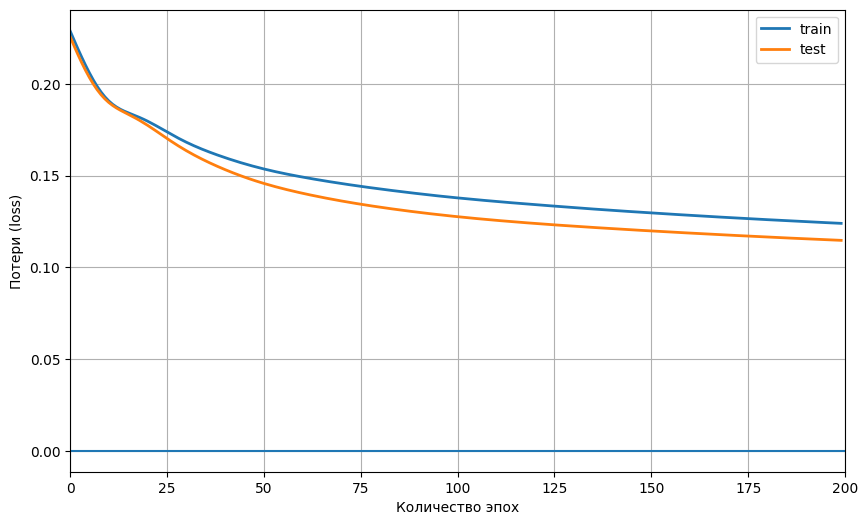

In [34]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('MeanSquaredError')
history_6 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_6)

# Mean Squared Logarithmic Error

Epoch 1/200
1/1 [==============================] - 1s 731ms/step - loss: 0.0958 - accuracy: 0.4260 - val_loss: 0.0921 - val_accuracy: 0.4660
Epoch 2/200
1/1 [==============================] - 0s 42ms/step - loss: 0.0940 - accuracy: 0.4440 - val_loss: 0.0906 - val_accuracy: 0.4740
Epoch 3/200
1/1 [==============================] - 0s 59ms/step - loss: 0.0924 - accuracy: 0.4500 - val_loss: 0.0893 - val_accuracy: 0.4820
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 0.0912 - accuracy: 0.4540 - val_loss: 0.0882 - val_accuracy: 0.5080
Epoch 5/200
1/1 [==============================] - 0s 38ms/step - loss: 0.0901 - accuracy: 0.4680 - val_loss: 0.0873 - val_accuracy: 0.5240
Epoch 6/200
1/1 [==============================] - 0s 41ms/step - loss: 0.0892 - accuracy: 0.4900 - val_loss: 0.0864 - val_accuracy: 0.5400
Epoch 7/200
1/1 [==============================] - 0s 45ms/step - loss: 0.0884 - accuracy: 0.5000 - val_loss: 0.0856 - val_accuracy: 0.5460
Epoch 8/200
1/1 [==

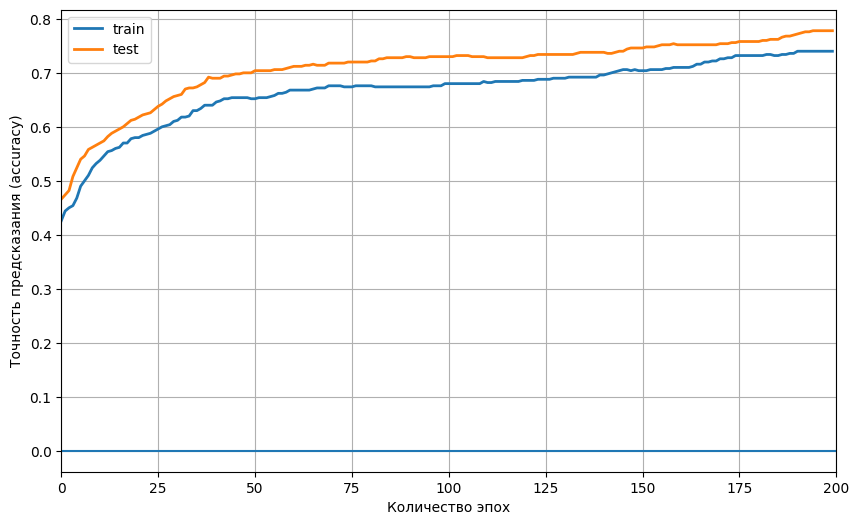

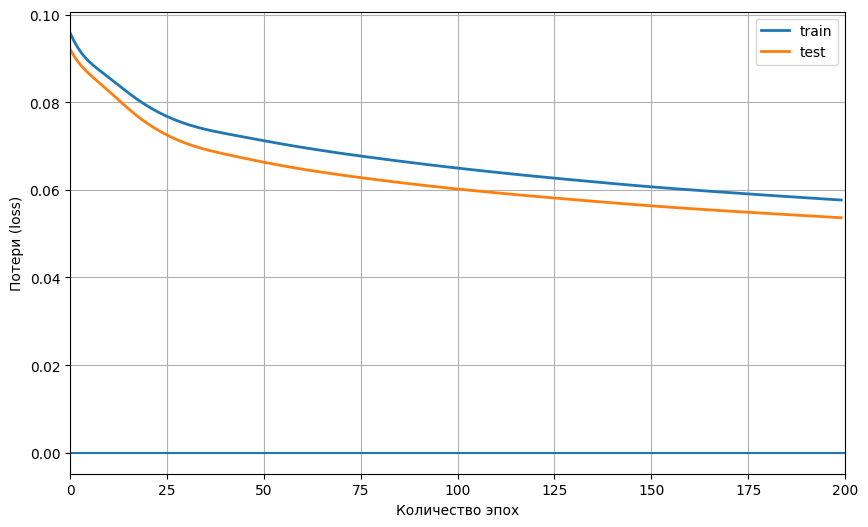

In [35]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('MeanSquaredLogarithmicError')
history_7 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_7)

# Squared Hinge

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.2872 - accuracy: 0.4060 - val_loss: 1.2733 - val_accuracy: 0.4340
Epoch 2/200
1/1 [==============================] - 0s 104ms/step - loss: 1.2765 - accuracy: 0.4000 - val_loss: 1.2643 - val_accuracy: 0.4320
Epoch 3/200
1/1 [==============================] - 0s 129ms/step - loss: 1.2675 - accuracy: 0.3980 - val_loss: 1.2564 - val_accuracy: 0.4380
Epoch 4/200
1/1 [==============================] - 0s 84ms/step - loss: 1.2599 - accuracy: 0.3980 - val_loss: 1.2496 - val_accuracy: 0.4420
Epoch 5/200
1/1 [==============================] - 0s 141ms/step - loss: 1.2533 - accuracy: 0.4000 - val_loss: 1.2436 - val_accuracy: 0.4460
Epoch 6/200
1/1 [==============================] - 0s 102ms/step - loss: 1.2477 - accuracy: 0.4060 - val_loss: 1.2382 - val_accuracy: 0.4520
Epoch 7/200
1/1 [==============================] - 0s 71ms/step - loss: 1.2427 - accuracy: 0.4060 - val_loss: 1.2333 - val_accuracy: 0.4520
Epoch 8/200
1/1 [=

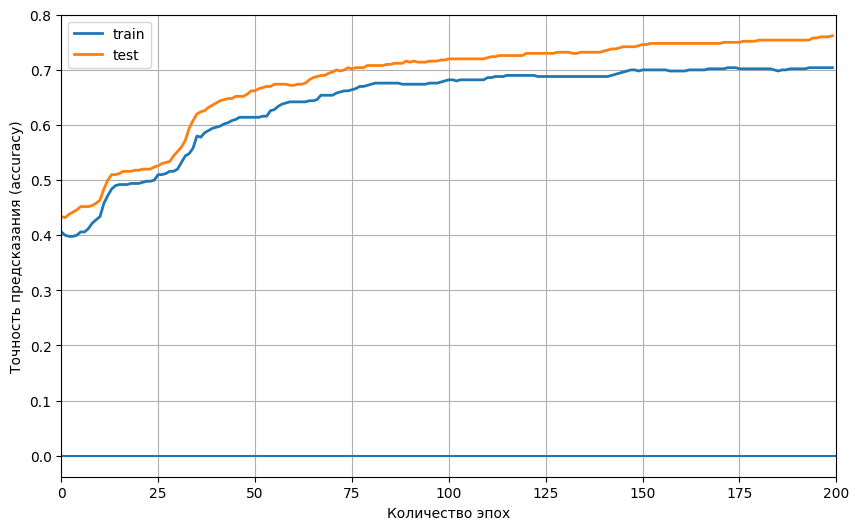

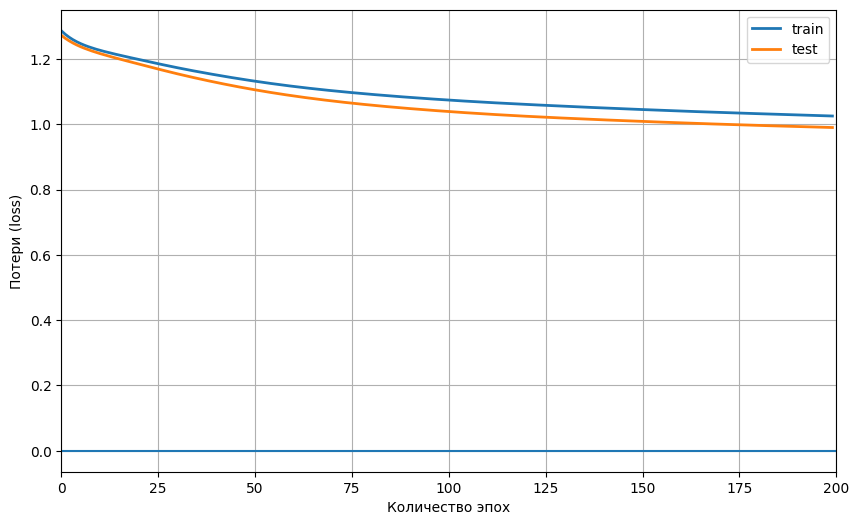

In [38]:
# Подгонка (обучение) модели
start_time = time.time()
model = NN_Model('SquaredHinge')
history_8 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Draw_Figure(history_8)